# Density Based k Nearest Neighbour (DB-kNN)

## Section 1: Implementation

In [1]:
import cppyy

# Read the content of the C++ file
with open('functions.cpp', 'r') as cpp_file:
    cpp_code = cpp_file.read()

# Compile the C++ code with cppyy
cppyy.cppdef(cpp_code)

# Access the compiled functions
euclidean_distance = cppyy.gbl.euclidean_distance
get_neighbor_distances = cppyy.gbl.get_neighbor_distances
calculate_hypersphere_volume = cppyy.gbl.calculate_hypersphere_volume
calculate_density = cppyy.gbl.calculate_density

# Example usage of a function
point1 = [1.0, 2.0, 3.0]
point2 = [4.0, 5.0, 6.0]
distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance: {distance}")


def numpy_to_std_vector_2d(numpy_array):
    vec = cppyy.gbl.std.vector[cppyy.gbl.std.vector['double']]()
    for row in numpy_array:
        vec_row = cppyy.gbl.std.vector['double']()
        for val in row:
            vec_row.push_back(val)
        vec.push_back(vec_row)
    return vec



Euclidean Distance: 5.196152422706632


# Euclidean Distance Formula

The **Euclidean Distance** is a measure of the straight-line distance between two points in a Euclidean space. It is commonly used in geometry, physics, and machine learning.

## Formula

For two points in a 2D space, \( P(x_1, y_1) \) and \( Q(x_2, y_2) \), the Euclidean distance \( d \) is calculated as:

$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

For points in a higher-dimensional space, the formula generalizes to:

$$ d = \sqrt{\sum_{i=1}^n (q_i - p_i)^2} $$

Where:
- \( p_i \) and \( q_i \) are the coordinates of the points in each dimension.
- \( n \) is the total number of dimensions.

## Explanation

1. Compute the difference between corresponding coordinates of the two points.
2. Square each difference to ensure non-negative values.
3. Sum the squared differences.
4. Take the square root of the sum to find the distance.

### Example in 2D

Consider two points:
- \( P(3, 4) \)
- \( Q(7, 1) \)

The distance \( d \) is:

$$ d = \sqrt{(7 - 3)^2 + (1 - 4)^2} $$
$$ d = \sqrt{4^2 + (-3)^2} $$
$$ d = \sqrt{16 + 9} $$
$$ d = \sqrt{25} $$
$$ d = 5 $$

### Applications

- **Geometry**: To find the distance between two points in space.
- **Machine Learning**: Used in clustering algorithms like K-means.
- **Physics**: To calculate displacement in Euclidean space.

---

> **Note:** Euclidean distance assumes a flat geometry and does not account for curvature or other constraints in non-Euclidean spaces.



In [2]:
'''

// Function to calculate Euclidean distance between two points.
double euclidean_distance(const std::vector<double>& point1, const std::vector<double>& point2) {
    if (point1.size() != point2.size()) {
        throw std::invalid_argument("Points must have the same dimensions.");
    }

    double distance = 0.0;
    for (size_t i = 0; i < point1.size(); ++i) {
        distance += std::pow(point1[i] - point2[i], 2);
    }
    return std::sqrt(distance);
}

// Function to compute distances from a target point to all points in a dataset.
std::vector<double> get_neighbor_distances(const std::vector<std::vector<double>>& data, const std::vector<double>& target_point) {
    std::vector<double> distances;
    for (const auto& point : data) {
        distances.push_back(euclidean_distance(point, target_point));
    }
    return distances;
}

'''

'\n\n// Function to calculate Euclidean distance between two points.\ndouble euclidean_distance(const std::vector<double>& point1, const std::vector<double>& point2) {\n    if (point1.size() != point2.size()) {\n        throw std::invalid_argument("Points must have the same dimensions.");\n    }\n\n    double distance = 0.0;\n    for (size_t i = 0; i < point1.size(); ++i) {\n        distance += std::pow(point1[i] - point2[i], 2);\n    }\n    return std::sqrt(distance);\n}\n\n// Function to compute distances from a target point to all points in a dataset.\nstd::vector<double> get_neighbor_distances(const std::vector<std::vector<double>>& data, const std::vector<double>& target_point) {\n    std::vector<double> distances;\n    for (const auto& point : data) {\n        distances.push_back(euclidean_distance(point, target_point));\n    }\n    return distances;\n}\n\n'

# Hypersphere Volume Calculation

The volume of a hypersphere is a generalization of the concept of a sphere into higher dimensions. It is calculated using the following mathematical formula:

## Formula

The formula to calculate the volume of a hypersphere is:

$$ V = \frac{\pi^{n/2} \cdot r^n}{\Gamma\left(\frac{n}{2} + 1\right)} $$

Where:
- $V$: Volume of the hypersphere
- $r$: Radius of the hypersphere
- $n$: Number of dimensions
- $\Gamma$: Gamma function, a generalization of the factorial. For integers:
  - $\Gamma(k) = (k - 1)!$

---

## Step-by-Step Explanation

1. **Input Parameters**:
   - **Radius ($r$)**: The length from the center of the hypersphere to any point on its surface.
   - **Dimensions ($n$)**: The number of dimensions in which the hypersphere exists.

2. **Mathematical Components**:
   - $\pi^{n/2}$: This accounts for the geometric complexity as the dimensions increase.
   - $r^n$: This scales the hypersphere's size based on its radius in $n$-dimensions.
   - $\Gamma\left(\frac{n}{2} + 1\right)$: Adjusts the volume based on factorial-like behavior in higher dimensions.

3. **Formula Application**:
   - Calculate $\pi^{n/2}$.
   - Raise the radius $r$ to the power $n$.
   - Compute $\Gamma\left(\frac{n}{2} + 1\right)$ using the Gamma function.
   - Divide the numerator $\pi^{n/2} \cdot r^n$ by $\Gamma\left(\frac{n}{2} + 1\right)$.

---

## Example Calculation

Let's compute the volume of a 3-dimensional sphere (standard sphere) with a radius of $r = 2$:

1. $n = 3$ (3 dimensions)
2. Formula:
   $$ V = \frac{\pi^{3/2} \cdot 2^3}{\Gamma(2.5)} $$

   - $\pi^{3/2} \approx 5.568$
   - $2^3 = 8$
   - $\Gamma(2.5) \approx 1.329$

3. Substitute:
   $$ V \approx \frac{5.568 \cdot 8}{1.329} $$

4. Result:
   $$ V \approx 33.51 $$

Thus, the volume of a 3-dimensional sphere with a radius of 2 is approximately $33.51$.

---

## Applications of Hypersphere Volume

- **Geometry**: Understanding higher-dimensional spaces.
- **Physics**: Modeling in higher-dimensional theories.
- **Data Science**: Evaluating high-dimensional space properties in machine learning and clustering.

---

> **Note**: As dimensions increase, the hypersphere's volume behaves non-intuitively, peaking at certain dimensions before approaching zero in extremely high dimensions.


In [3]:
'''

// Function to calculate the volume of a hypersphere.
double calculate_hypersphere_volume(double radius, int dimensions) {
    if (dimensions < 1) {
        throw std::invalid_argument("Dimensions must be a positive integer.");
    }

    double pi = M_PI;
    double volume = std::pow(pi, dimensions / 2.0) * std::pow(radius, dimensions) / std::tgamma(dimensions / 2.0 + 1.0);
    return volume;
}

'''

'\n\n// Function to calculate the volume of a hypersphere.\ndouble calculate_hypersphere_volume(double radius, int dimensions) {\n    if (dimensions < 1) {\n        throw std::invalid_argument("Dimensions must be a positive integer.");\n    }\n\n    double pi = M_PI;\n    double volume = std::pow(pi, dimensions / 2.0) * std::pow(radius, dimensions) / std::tgamma(dimensions / 2.0 + 1.0);\n    return volume;\n}\n\n'

# Density Calculation

Density is a measure used to capture the concentration of data points within a specific neighborhood. It provides critical insight into the structure of a dataset.

## Formula for Structural Density

The structural density $D$ of a point is calculated as:

$$ D = \frac{\text{Number of Points in Neighborhood}}{\text{Volume of the Neighborhood}} $$

Where:
- **Neighborhood** is defined as the region within a radius $r$ around the point.
- **Volume of the Neighborhood** depends on the dimensionality of the data.

---

## Steps to Compute Density

1. **Define the Neighborhood**:  
   Select a radius $r$ that determines the neighborhood around a point.

2. **Count Points**:  
   Count the number of points within the neighborhood.

3. **Calculate the Volume**:  
   Compute the volume of the neighborhood. For example:
   - In 2D, the volume is the area of a circle:  
     $ \text{Volume} = \pi r^2 $
   - In 3D, the volume is the volume of a sphere:  
     $ \text{Volume} = \frac{4}{3} \pi r^3 $

4. **Compute Density**:  
   Use the formula:  
   $ D = \frac{\text{Number of Points}}{\text{Volume}} $

---

## Applications of Density in kNN

- **Structural Insight**:  
  Density highlights regions of high and low data concentration.
  
- **Improved Classification**:  
  By incorporating density into the kNN classifier, neighbors are evaluated not just by distance but also by their contribution to local density.

> **Note**: The choice of radius $r$ significantly impacts the density calculation and must be chosen carefully based on the dataset.


In [4]:
'''

// Function to calculate density based on hypersphere approach.
std::vector<double> calculate_density(const std::vector<std::vector<double>>& data, double radius) {
    size_t n = data.size();
    if (n == 0) {
        throw std::invalid_argument("Data cannot be empty.");
    }

    int dimensions = data[0].size();
    double volume = calculate_hypersphere_volume(radius, dimensions);

    std::vector<double> densities;
    for (const auto& target_point : data) {
        int count = 0;
        for (const auto& point : data) {
            if (euclidean_distance(target_point, point) <= radius) {
                ++count;
            }
        }
        densities.push_back(count / volume);
    }

    return densities;
}

'''

'\n\n// Function to calculate density based on hypersphere approach.\nstd::vector<double> calculate_density(const std::vector<std::vector<double>>& data, double radius) {\n    size_t n = data.size();\n    if (n == 0) {\n        throw std::invalid_argument("Data cannot be empty.");\n    }\n\n    int dimensions = data[0].size();\n    double volume = calculate_hypersphere_volume(radius, dimensions);\n\n    std::vector<double> densities;\n    for (const auto& target_point : data) {\n        int count = 0;\n        for (const auto& point : data) {\n            if (euclidean_distance(target_point, point) <= radius) {\n                ++count;\n            }\n        }\n        densities.push_back(count / volume);\n    }\n\n    return densities;\n}\n\n'

# Class Scores Calculation

**Class scores** are numerical values that quantify the relationship between a test point and each class in the dataset. These scores are used to evaluate which class a test point most likely belongs to, forming the foundation for classification decisions.

---

## General Formula for Class Scores

Class scores are calculated as:

$$ \text{Score}_{c} = \sum_{i=1}^{k} \frac{\text{Attribute of Neighbor } i}{\text{Distance from Neighbor } i} $$

Where:
- $k$ is the number of neighbors considered.
- $\text{Attribute of Neighbor } i$ refers to a value that measures the influence of the $i$-th neighbor (e.g., density, weight, discernibility).
- $\text{Distance from Neighbor } i$ is the Euclidean distance between the test point and the $i$-th neighbor.

---

## Steps to Compute Class Scores

1. **Identify Neighbors**:
   - Find the $k$ nearest neighbors of the test point.

2. **Compute Neighbor Contributions**:
   - For each neighbor, compute its contribution to the score of its class:
     $$ \text{Contribution}_{i} = \frac{\text{Neighbor's Attribute}}{\text{Distance from Neighbor}} $$

3. **Aggregate Contributions by Class**:
   - Sum the contributions of all neighbors belonging to the same class to compute the class score:
     $$ \text{Score}_{c} = \sum_{i=1}^{k} \text{Contribution}_{i} \text{ for Class } c $$

---

## Example Calculation

Assume:
- A test point with $k=3$ neighbors.
- Neighbors have the following attributes and distances:

| Neighbor | Class | Attribute (e.g., density) | Distance |
|----------|-------|---------------------------|----------|
| 1        | A     | 0.8                       | 1.2      |
| 2        | B     | 0.6                       | 1.5      |
| 3        | A     | 0.7                       | 1.3      |

### Steps:

1. **Compute Contributions**:
   - For Neighbor 1 (Class A):  
     $$ \text{Contribution}_{1} = \frac{0.8}{1.2} = 0.6667 $$
   - For Neighbor 2 (Class B):  
     $$ \text{Contribution}_{2} = \frac{0.6}{1.5} = 0.4 $$
   - For Neighbor 3 (Class A):  
     $$ \text{Contribution}_{3} = \frac{0.7}{1.3} = 0.5385 $$

2. **Aggregate Contributions**:
   - Class A:  
     $$ \text{Score}_{A} = 0.6667 + 0.5385 = 1.2052 $$
   - Class B:  
     $$ \text{Score}_{B} = 0.4 $$

3. **Result**:
   - Class A has a higher score ($1.2052$) compared to Class B ($0.4$).  
   - The test point is classified as **Class A**.

---

## Significance of Class Scores

- **Improved Decision Making**:
  - Class scores take into account both the proximity and influence of neighbors.
  
- **Confidence Assessment**:
  - Higher class scores indicate stronger evidence for a particular classification.

- **Flexibility**:
  - Attributes like density, weights, or discernibility can be incorporated to refine class scores.

---

> **Note**: The choice of the attribute and the distance metric significantly impacts the class score calculation and the final classification.


In [5]:
def calculate_class_scores(neighbor_indices, y_train, densities_normalized, distances):
    class_scores = {}
    for neighbor_index in neighbor_indices:
        label = y_train[neighbor_index]
        score = densities_normalized[neighbor_index] / (distances[neighbor_index] + 1e-5)  # Avoid division by zero
        if label in class_scores:
            class_scores[label] += score
        else:
            class_scores[label] = score
    return class_scores


# Degree of Certainty (DC)

The **Degree of Certainty (DC)** is a measure used to quantify how confident a classifier is in its classification decision. It generalizes the concept of the Certainty Factor (CF) and provides a numerical index of confidence for each classification.

---

## Formula for Degree of Certainty

The Degree of Certainty is calculated as:

$$ DC = \frac{\text{Classification Score of Selected Class}}{\sum_{c=1}^{\# \text{classes}} \text{Classification Score of Class } c} $$

Where:
- **Classification Score** is a measure that determines the likelihood of a test point belonging to a particular class.
- $\# \text{classes}$ is the total number of classes.

---

## Steps to Compute Degree of Certainty

1. **Calculate Classification Scores**:
   - For each class, compute a score (e.g., based on distances, densities, or weights) that quantifies how strongly a test point is associated with that class.

2. **Determine the Selected Class**:
   - Identify the class with the highest classification score as the predicted class.

3. **Compute the Degree of Certainty**:
   - Divide the classification score of the predicted class by the sum of classification scores of all classes.

---

## Example Calculation

Suppose a test point is evaluated against three classes with the following classification scores:
- Class 1: $0.6$
- Class 2: $0.3$
- Class 3: $0.1$

### Steps:
1. **Identify the Selected Class**:
   - Class 1 has the highest score ($0.6$), so it is the selected class.

2. **Sum of Scores**:
   - $0.6 + 0.3 + 0.1 = 1.0$

3. **Calculate DC**:
   - $$ DC = \frac{0.6}{1.0} = 0.6 $$

Thus, the Degree of Certainty for this classification is $0.6$.

---

## Applications of Degree of Certainty

- **Confidence Measurement**:
  - It provides insight into the classifier's confidence in its decision.

- **Thresholding for Reliability**:
  - Classifications with low DC values can be flagged as unreliable, and fallback mechanisms (e.g., traditional kNN) can be applied.

- **Classifier Evaluation**:
  - DC is often used in conjunction with measures like **Net Reliability** to assess the overall performance of a classifier.

---

> **Note**: A higher Degree of Certainty indicates a more confident classification, while lower values suggest ambiguity in the decision-making process.


In [6]:
def calculate_degree_of_certainty(class_scores):
    total_score = sum(class_scores.values())
    max_score = max(class_scores.values())
    return max_score / total_score if total_score > 0 else 0

# Classification Process of DB-kNN Algorithm

The **Density-Based k-Nearest Neighbors (DB-kNN)** algorithm enhances the traditional kNN method by incorporating the concept of **structural density** to refine the influence of neighbors during the classification process. Below is a step-by-step explanation of how the classification is performed.

---

## Algorithm Workflow

### 1. **Input**
The function takes the following inputs:
- `train_data`: Training dataset containing features and labels.
- `y_train`: Labels of the training dataset.
- `test_data`: Test dataset to classify.
- `k`: Number of nearest neighbors to consider.
- `radius`: Radius for calculating densities.

---

### 2. **Precomputing Densities**
The algorithm starts by precomputing the densities of all training points using the **structural density formula**:
$$ D = \frac{\text{Number of Points in Neighborhood}}{\text{Volume of Neighborhood}} $$

#### Steps:
1. Calculate the density of each training point based on the given `radius`.
2. Normalize the densities to the range [0, 1] for consistent comparison:
   $$ \text{Normalized Density} = \frac{D}{\max(D)} $$

---

### 3. **Classification of Test Points**
For each test point in the test dataset:
1. **Compute Distances**:
   - Calculate the Euclidean distance between the test point and all training points:
     $$ \text{Distance}_{i} = \sqrt{\sum_{j=1}^{n} (x_{i,j} - x_{\text{test},j})^2} $$

2. **Find Nearest Neighbors**:
   - Identify the indices of the `k` nearest neighbors based on the smallest distances.

3. **Calculate Class Scores**:
   - For each class, compute the **class scores** using the neighbors:
     $$ \text{Score}_{c} = \sum_{i \in \text{Neighbors}} \frac{\text{Density}_{i}}{\text{Distance}_{i}} $$
   - This evaluates both the density and proximity of neighbors for each class.

4. **Compute Degree of Certainty (DC)**:
   - Calculate the confidence in the classification decision using:
     $$ DC = \frac{\text{Score of Predicted Class}}{\sum_{\text{Classes}} \text{Scores}} $$

---

### 4. **Decision Making**
Based on the Degree of Certainty (DC):
- **Case 1: High DC (Reliable Classification)**:
  - If $DC \geq 0.667$, classify the test point as the class with the highest score.

- **Case 2: Low DC (Fallback to Classic kNN)**:
  - If $DC < 0.667$, the classification is considered unreliable.
  - Fall back to traditional kNN by using majority voting among the `k` nearest neighbors.

---

### 5. **Output**
The predicted class for each test point is appended to the `predictions` list, and the final predictions are returned as a NumPy array.

---

## Example Workflow for a Single Test Point

### Inputs:
- Test point: `[2.5, 3.0]`
- Training data with precomputed densities.
- `k = 3`, `radius = 1.0`.

### Steps:
1. **Compute Distances**:
   - Calculate the distance of the test point to all training points.

2. **Find Nearest Neighbors**:
   - Select the 3 nearest neighbors based on distance.

3. **Calculate Class Scores**:
   - For each class, compute:
     $$ \text{Score}_{c} = \sum_{i \in \text{Neighbors}} \frac{\text{Density}_{i}}{\text{Distance}_{i}} $$

4. **Degree of Certainty**:
   - Compute $DC$ to determine confidence.

5. **Decision**:
   - If $DC \geq 0.667$, predict the class with the highest score.
   - If $DC < 0.667$, fall back to traditional kNN.

6. **Output**:
   - Append the predicted class to the result list.

---

## Advantages of DB-kNN

1. **Incorporation of Density**:
   - Refines the influence of neighbors using structural density.
   
2. **Improved Reliability**:
   - The Degree of Certainty ensures confident classifications.

3. **Fallback Mechanism**:
   - Uses classic kNN when density-based decisions are unreliable.

---

> **Note**: The DB-kNN algorithm enhances classification performance, particularly in datasets with complex structures, by evaluating neighbors based on both density and distance.


In [7]:
from collections import Counter
import numpy as np

def db_knn_predict(train_data, y_train, test_data, k, radius):
    # Split features and labels
    X_train = train_data[:, :-1]  # Features of training data
    y_train = train_data[:, -1]  # Labels of training data
    X_test = test_data[:, :-1]   # Features of testing data

    # Convert X_train to std::vector<std::vector<double>>
    X_train_converted = numpy_to_std_vector_2d(X_train)

    # Precompute densities for training points using the C++ function
    densities_cpp = calculate_density(X_train_converted, radius)
    densities = np.array([float(value) for value in densities_cpp])  # Convert to NumPy array
    densities_normalized = densities / np.max(densities)

    predictions = []
    for test_point in X_test:
        # Convert test_point to a C++ compatible std::vector<double>
        test_point_converted = cppyy.gbl.std.vector['double']()
        for val in test_point:
            test_point_converted.push_back(val)

        # Compute distances from the test point to all training points
        distances_cpp = get_neighbor_distances(X_train_converted, test_point_converted)
        distances = np.array([float(value) for value in distances_cpp])  # Convert to NumPy array

        # Find the k nearest neighbors
        neighbor_indices = np.argsort(distances)[:k]

        # Calculate scores for each class using a C++ function (ensure this function exists in C++)
        neighbor_indices_converted = cppyy.gbl.std.vector['int']()
        for idx in neighbor_indices:
            neighbor_indices_converted.push_back(int(idx))

        class_scores_cpp = calculate_class_scores(neighbor_indices_converted, y_train, densities_normalized, distances)
        class_scores = {int(k): float(v) for k, v in class_scores_cpp.items()}  # Convert to Python dictionary

        # Calculate Degree of Certainty using a C++ function (ensure this function exists in C++)
        dc = calculate_degree_of_certainty(class_scores)

        if dc < 0.667:
            # Fallback to classic kNN
            nearest_label_counts = Counter(y_train[neighbor_indices])
            predicted_class = nearest_label_counts.most_common(1)[0][0]
        else:
            # Predict the class with the highest score
            predicted_class = max(class_scores, key=class_scores.get)

        predictions.append(predicted_class)

    return np.array(predictions)


## Helper Functions

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from time import time

def perform_kfold_cross_validation(X, y, classifier, k=3, radius=1.0, n_splits=10, random_state=47):
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    start_time = time()

    # Prepare variables to store results
    accuracies = []
    all_predictions = []
    all_true_labels = []

    for train_index, test_index in kf.split(X):
        # Split the data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Combine features and labels for DB-kNN
        train_data = np.hstack((X_train, y_train.reshape(-1, 1)))
        test_data = np.hstack((X_test, y_test.reshape(-1, 1)))

        predictions = None

        # Check if the classifier is db_knn or not 
        if radius < 0:
            # this is not the db_knn fucntion
            classifier.fit(X_train, y_train)
            predictions = classifier.predict(X_test)

        else:
            # this is the db_knn function
            predictions = classifier(train_data, y_train, test_data, k=k, radius=radius)

        # Store results
        accuracies.append(accuracy_score(y_test, predictions))
        all_predictions.extend(predictions)
        all_true_labels.extend(y_test)

    end_time = time()

    results = {
        "accuracies": accuracies,
        "mean_accuracy": np.mean(accuracies),
        "all_predictions": all_predictions,
        "all_true_labels": all_true_labels,
        "runtime": end_time - start_time
    }

    return results


In [9]:
def grid_search_optimization(X, y, classifier, k_values, radius_values, n_splits=10, random_state=47):
    best_k = None
    best_radius = None
    best_accuracy = 0

    for k in k_values:
        for radius in radius_values:
            print(f"Testing k={k}, radius={radius}...")
            results = perform_kfold_cross_validation(X, y, classifier, k=k, radius=radius, n_splits=n_splits, random_state=random_state)
            mean_accuracy = results["mean_accuracy"]

            if mean_accuracy > best_accuracy:
                best_k = k
                best_radius = radius
                best_accuracy = mean_accuracy

            print(f"k={k}, radius={radius}, Mean Accuracy={mean_accuracy:.6f}")

    return {
        "best_k": best_k,
        "best_radius": best_radius,
        "best_accuracy": best_accuracy
    }

# Example usage:
# k_values = [5, 7, 9, 11]
# radius_values = [4.0, 5.0, 5.2, 6.0]
# best_params = grid_search_optimization(X, y, db_knn_predict, k_values, radius_values)
# print(f"Best k: {best_params['best_k']}, Best radius: {best_params['best_radius']}, Best Accuracy: {best_params['best_accuracy']:.6f}")

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(all_true_labels, all_predictions):
    
    class_labels = list(set(all_true_labels).union(set(all_predictions)))

    # Generate the confusion matrix
    cm = confusion_matrix(all_true_labels, all_predictions, labels=class_labels)

    # Create a heatmap for the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

    # Add labels and titles
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)

    # Display the heatmap
    plt.show()

# Overview of Datasets for DB-kNN

The DB-kNN algorithm will be evaluated using the following datasets. These datasets provide diverse classification challenges, enabling a comprehensive assessment of the algorithm.

---

## 1. BUPA Liver Disorders Dataset
- **Attributes**: 6
- **Instances**: 345
- **Classes**: 2 
- **Feature Names**:
  - Mean Corpuscular Volume (MCV)
  - Alkaline Phosphotase (ALP)
  - Alanine Aminotransferase (ALT)
  - Aspartate Aminotransferase (AST)
  - Gamma-Glutamyl Transpeptidase (GGT)
  - Number of half-pint equivalents of alcoholic beverages drunk per day (target)
- **Metadata**:
  - **Attribute Types**: Continuous
  - **Missing Values**: No
  - **Task**: Regression (often used for classification after discretization)
- **Description**:  
  The dataset includes blood tests thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each record corresponds to a single male individual. The target variable, 'drinks', is continuous but has been used in classification tasks after dichotomizing.  
  [Link to Dataset](https://archive.ics.uci.edu/dataset/60/liver+disorders)

---

## 2. Pima Indians Diabetes Dataset
- **Attributes**: 8
- **Instances**: 768
- **Classes**: 2
- **Feature Names**:
  - Pregnancies: Number of times pregnant
  - Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test
  - BloodPressure: Diastolic blood pressure (mm Hg)
  - SkinThickness: Triceps skinfold thickness (mm)
  - Insulin: 2-hour serum insulin (mu U/ml)
  - BMI: Body mass index (weight in kg/(height in m)^2)
  - DiabetesPedigreeFunction: Diabetes pedigree function
  - Age: Age in years
- **Metadata**:
  - **Attribute Types**: Continuous
  - **Missing Values**: No
  - **Task**: Binary Classification
- **Description**:  
  This dataset contains medical diagnostic measurements to predict the onset of diabetes in Pima Indian women.  
  [Link to Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

---

## 3. Breast Cancer Wisconsin (Diagnostic) Dataset
- **Attributes**: 30
- **Instances**: 569
- **Classes**: 2
- **Feature Names**:  
  Each feature represents a mean, standard error, or "worst" value (largest mean of all cells) for various cell characteristics:
  - Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Concave Points, Symmetry, Fractal Dimension
- **Metadata**:
  - **Attribute Types**: Continuous
  - **Missing Values**: No
  - **Task**: Binary Classification
- **Description**:  
  Features are computed from digitized images of fine needle aspirate (FNA) of breast masses, describing characteristics of the cell nuclei present in the images.  
  [Link to Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

---

## 4. Heart Disease Dataset
- **Attributes**: 13
- **Instances**: 303
- **Classes**: 2
- **Feature Names**:
  - Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, Slope, CA (number of major vessels), Thalassemia
- **Metadata**:
  - **Attribute Types**: Mixed (Categorical and Continuous)
  - **Missing Values**: Yes
  - **Task**: Binary Classification
- **Description**:  
  This dataset includes medical records used to predict the presence of heart disease in patients.  
  [Link to Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

---

## 5. Vehicle Silhouette Dataset
- **Attributes**: 18
- **Instances**: 846
- **Classes**: 4
- **Feature Names**:
  - Compactness, Circularity, Distance Circularity, Radius Ratio, Principal Axis Aspect Ratio, Elongatedness, Orientation, Perimeter Ratio of Major Axis, Perimeter Ratio of Minor Axis, and others
- **Metadata**:
  - **Attribute Types**: Continuous
  - **Missing Values**: No
  - **Task**: Multi-Class Classification
- **Description**:  
  This dataset contains features extracted from vehicle silhouettes, aiming to classify vehicles into four types.  
  [Link to Dataset](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes)


---

## Summary of Datasets

| Dataset                       | Attributes | Instances | Classes | Attribute Types       | Missing Values | Task                      |
|-------------------------------|------------|-----------|---------|-----------------------|----------------|--------------------------|
| BUPA Liver Disorders          | 6          | 345       | 2       | Continuous            | No             | Binary Classification    |
| Pima Indians Diabetes         | 8          | 768       | 2       | Continuous            | No             | Binary Classification    |
| Breast Cancer Wisconsin       | 30         | 569       | 2       | Continuous            | No             | Binary Classification    |
| Heart Disease                 | 13         | 303       | 2       | Mixed                 | Yes            | Binary Classification    |
| Vehicle Silhouette            | 18         | 846       | 4       | Continuous            | No             | Multi-Class Classification|

---

## Dataset Order for Testing
1. BUPA Liver Disorders
2. Pima Indians Diabetes
3. Breast Cancer Wisconsin (Diagnostic)
4. Heart Disease
5. Vehicle Silhouette

---

> **Note**: The optimal number of neighbors ($k$) for each dataset was determined based on prior experiments, as referenced in the paper.


# 1. BUPA Liver Disorders Dataset

## Steps for Analysis and Classification:

### Step 1: Load the Dataset
- Download the dataset and load it into a DataFrame for further analysis.

### Step 2: Split Features and Target
- Separate the dataset into:
  - **Features (`X`)**: Input variables.
  - **Target (`y`)**: Discretized labels.

### Step 3: Normalize the Features
- Apply **StandardScaler** to normalize the features:
  $$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$
- Ensure all features are on a similar scale for effective distance calculations.

### Step 4: Visualize Class Distribution
- Plot a histogram of the target variable (`y`) to verify class distribution.

### Step 5: Perform Feature Analysis
- Explore feature interactions by plotting:
  - **2D Scatter Plots**: For all pairwise feature combinations.

### Step 6: Optimize Hyperparameters
- Use **Grid Search** to identify the best:
  - Number of neighbors (`k`).
  - Radius (`r`) for density calculation.
- Evaluate performance metrics for each combination.

### Step 7: Perform Cross-Validation
- Implement **10-Fold Cross-Validation** to evaluate the model:
  - Calculate mean **accuracy**, **net reliability**, and **time metrics** across folds.

### Step 8: Compare with Classic kNN
- Repeat the classification using traditional kNN with the same 10-Fold Cross-Validation setup.
- Compare metrics between **DB-kNN** and **Classic kNN**:
  - Accuracy.
  - Degree of Certainty.
  - Execution time.


In [11]:
# Step 1: Load the dataset

import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"
columns = ["mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks", "selector"]
data = pd.read_csv(url, names=columns)


In [12]:
# Step 2: Split the data into features (X) and target (y)
X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values  # Target

In [13]:
# Step 3: Standardize the features

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Concat the scaled features with the target
data.iloc[:, :-1] = X

/tmp/ipykernel_15507/1815153687.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.16160129 -1.16160129 -0.93645946  0.18924965 -0.71131764  1.7652424
 -0.48617582 -0.48617582  0.41439147 -0.03589217 -0.261034   -1.83702675
 -0.03589217 -0.93645946  1.31495876  0.18924965 -0.261034   -0.261034
  0.18924965  0.86467511  0.41439147  0.63953329 -0.03589217  1.31495876
 -1.38674311  0.41439147 -0.03589217 -0.48617582  0.18924965 -0.71131764
 -0.93645946  0.18924965  0.63953329 -0.48617582  0.86467511  0.18924965
 -1.16160129 -2.51245222 -1.16160129 -0.261034   -1.38674311 -0.261034
 -0.261034   -0.93645946 -1.16160129 -0.48617582  0.41439147  1.08981694
  0.18924965 -1.61188493 -0.261034   -1.16160129  0.41439147  0.86467511
 -0.71131764 -1.16160129 -1.38674311 -0.48617582  1.31495876 -0.03589217
 -0.03589217 -0.03589217  0.18924965  0.18924965 -0.71131764 -0.261034
 -0.261034   -1.16160129  2.89095152 -0.0358921

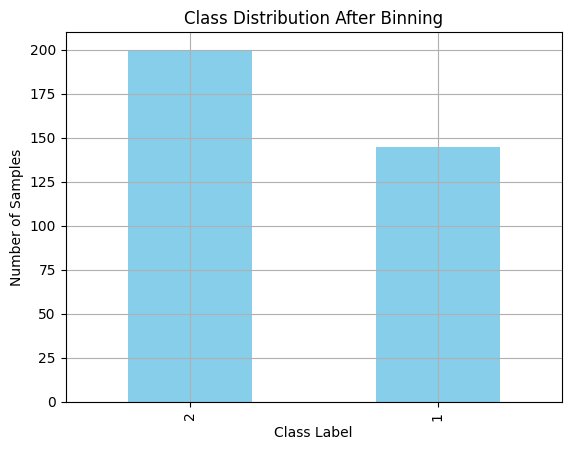

In [14]:
# Step 4: Visualize the new class Histogram

import matplotlib.pyplot as plt

# Visualize the new class distribution
data["selector"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Class Distribution After Binning")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

### Step 5: Plot the 2d plots

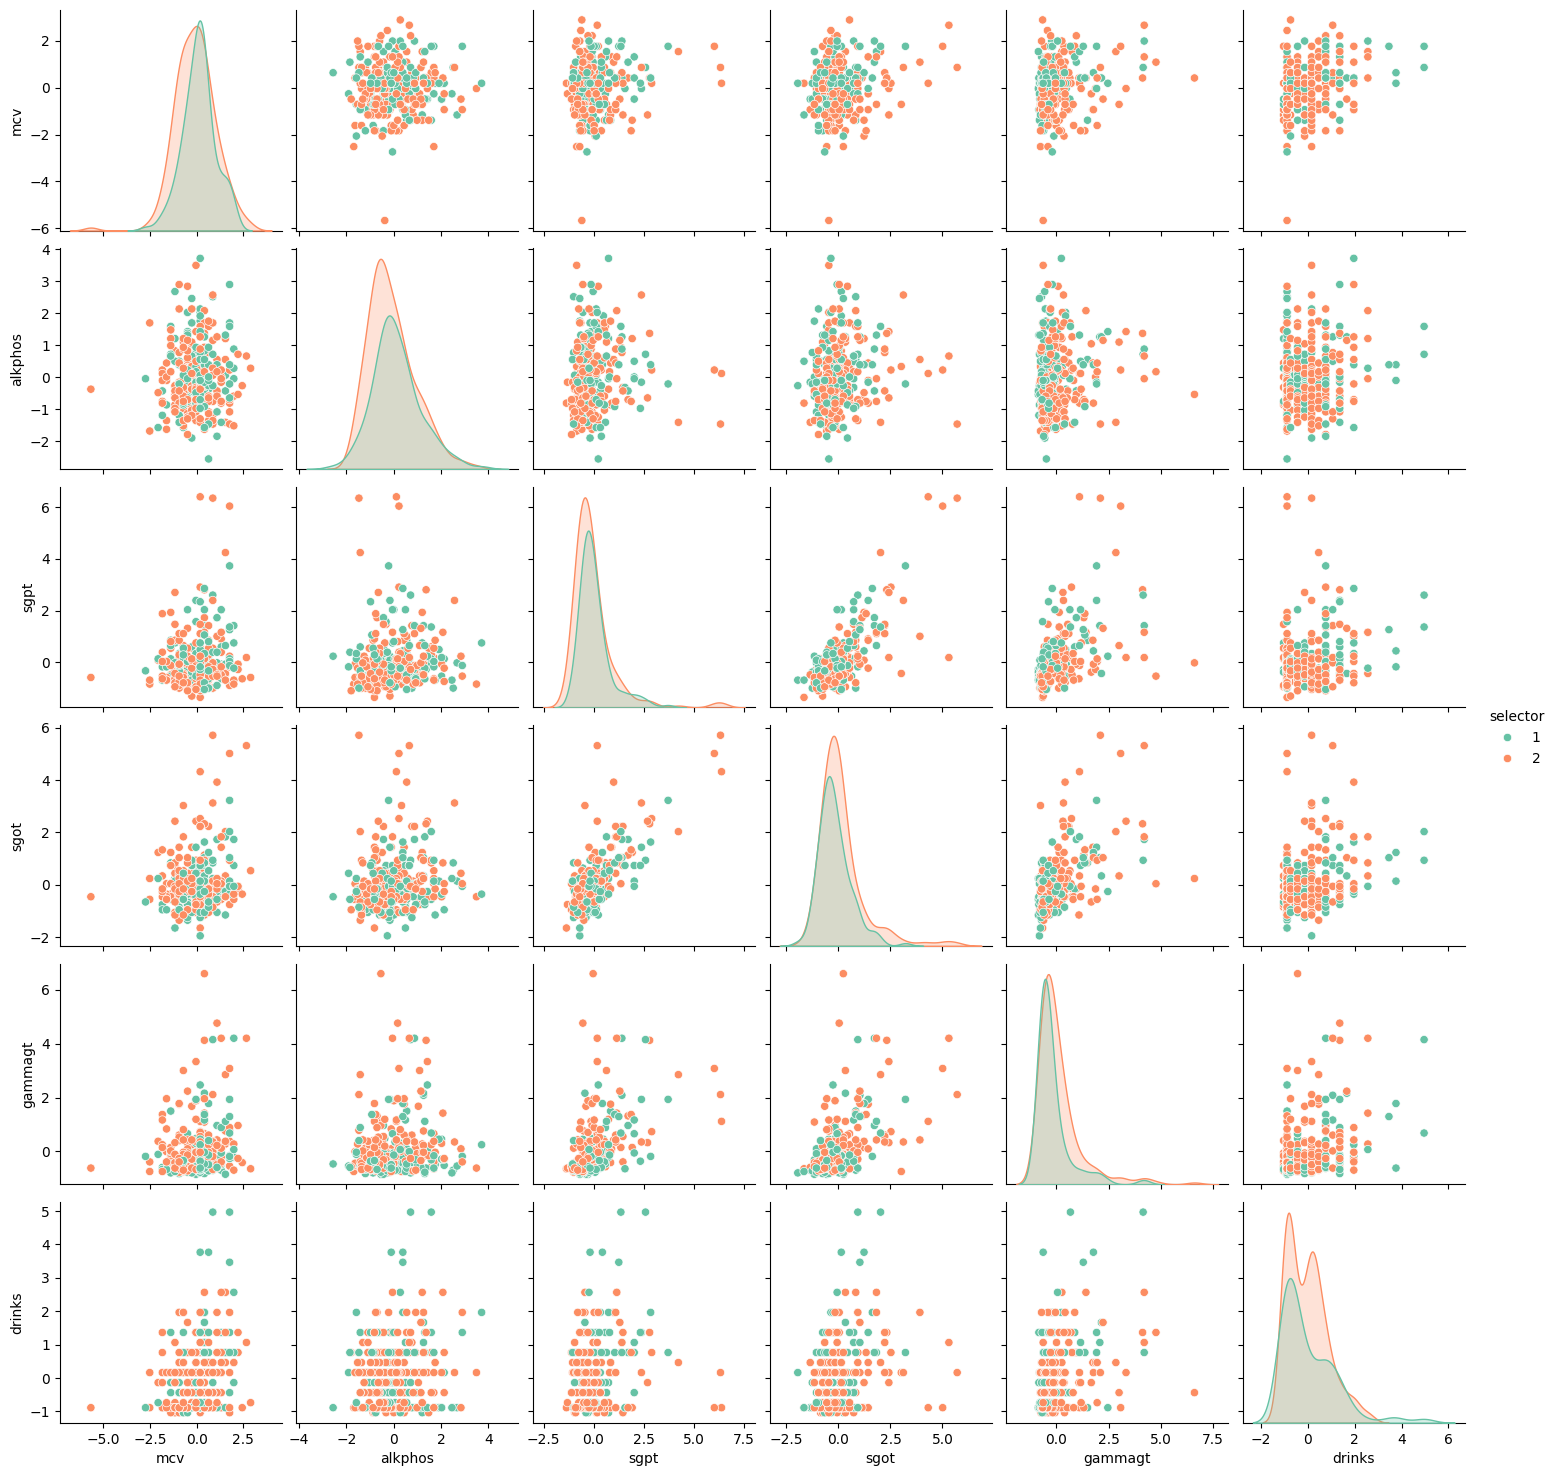

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of all the variables, color-coded by class
sns.pairplot(data, hue="selector", palette="Set2")
plt.show()


# Step 6: Optimize the number of neighbors ($k$) and radius ($r$)

In [28]:
k_values = np.arange(3, 31, 2)  # Start at 5, stop before 15, step by 2
radius_values = np.arange(1.0, 12.0, 0.2)
print(k_values)
print(radius_values)
best_params = grid_search_optimization(X=X, y=y,classifier=db_knn_predict, k_values=k_values, radius_values=radius_values, n_splits=10, random_state=47)
print(f"Best k: {best_params['best_k']}, Best radius: {best_params['best_radius']}, Best Accuracy: {best_params['best_accuracy']:.6f}")


[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6 11.8]
Testing k=3, radius=1.0...
k=3, radius=1.0, Mean Accuracy=0.742191
Testing k=3, radius=1.2...
k=3, radius=1.2, Mean Accuracy=0.743489
Testing k=3, radius=1.4...
k=3, radius=1.4, Mean Accuracy=0.740875
Testing k=3, radius=1.5999999999999999...
k=3, radius=1.5999999999999999, Mean Accuracy=0.736996
Testing k=3, radius=1.7999999999999998...
k=3, radius=1.7999999999999998, Mean Accuracy=0.735697
Testing k=3, radius=1.9999999999999998...
k=3, radius=1.9999999999999998, Mean Accuracy=0.739576
Testing k=3, radius=2.1999999999999997...
k=3, radius=2.1999999999999997, Mean Accuracy=0.740875
Testing k=3, radius=2.3999999999999995...
k=3, radius=2.3999999999999995, Mean Accuracy

## Step 7: Perform K-Fold Cross-Validation with the Optimized Parameters

In [17]:

results = perform_kfold_cross_validation(X=X, y=y, classifier=db_knn_predict, k=best_params["best_k"], radius=best_params["best_radius"], n_splits=10, random_state=47)

## Step 8: Plot the Confusion Matrix and metrics

In [18]:
print(f"Mean Accuracy: {results['mean_accuracy']:.6f}")
print(f"Runtime: {results['runtime']:.2f} seconds")

Mean Accuracy: 0.666891
Runtime: 0.03 seconds


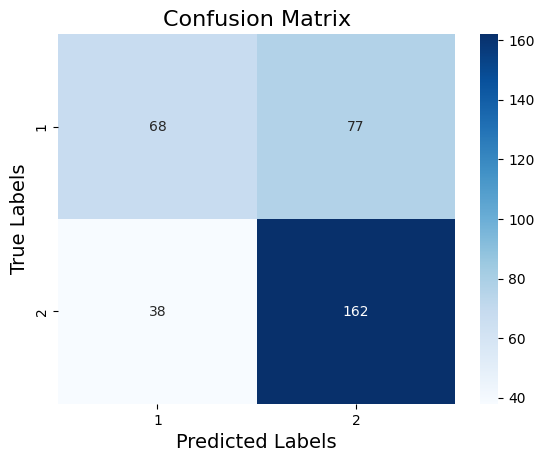

In [19]:
plot_confusion_matrix(results["all_true_labels"], results["all_predictions"])

In [20]:
from sklearn.neighbors import KNeighborsClassifier


classic_knn = KNeighborsClassifier(best_params["best_k"])

results_classic_knn = perform_kfold_cross_validation(X=X, y=y, classifier=classic_knn, k=best_params["best_k"], radius=-1, n_splits=10, random_state=47)


print(f"Mean Accuracy: {results_classic_knn['mean_accuracy']:.6f}")
print(f"Runtime: {results_classic_knn['runtime']:.2f} seconds")


Mean Accuracy: 0.655378
Runtime: 0.02 seconds


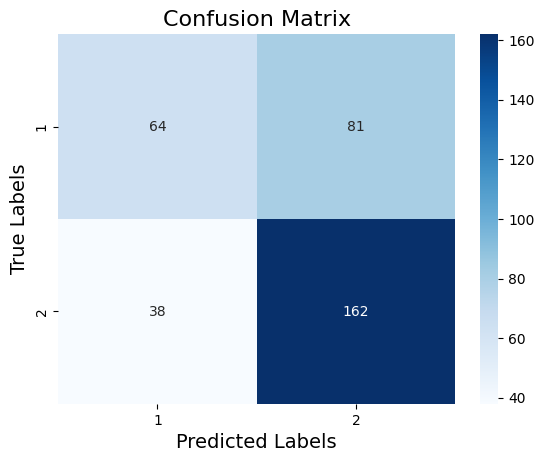

In [21]:
plot_confusion_matrix(results_classic_knn["all_true_labels"], results_classic_knn["all_predictions"])

# 2. Pima Indians Diabetes Dataset 


In [22]:
# Step 1: Load the dataset

import pandas as pd

path_pima = "diabetes.csv" 

columns = ["preg", "glucose", "bp", "skin", "insulin", "bmi", "dpf", "age", "class"]

data_pima = pd.read_csv(path_pima, names=columns)

# Remove the first row
data_pima = data_pima.iloc[1:]

In [23]:
# Step 2: Split the data into features (X) and target (y)
X = data_pima.iloc[:, :-1].values # Features
y = data_pima.iloc[:, -1].values  # Target

In [24]:
# Step 3: Standardize the features

from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Concat the scaled features with the target
data_pima.iloc[:, :-1] = X

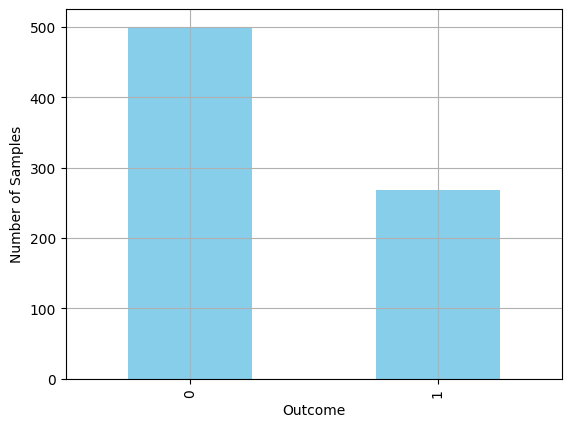

In [25]:
# Step 4: Visualize the new class Histogram

import matplotlib.pyplot as plt

# Visualize the new class distribution
data_pima["class"].value_counts().plot(kind="bar", color="skyblue")
plt.xlabel("Outcome")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

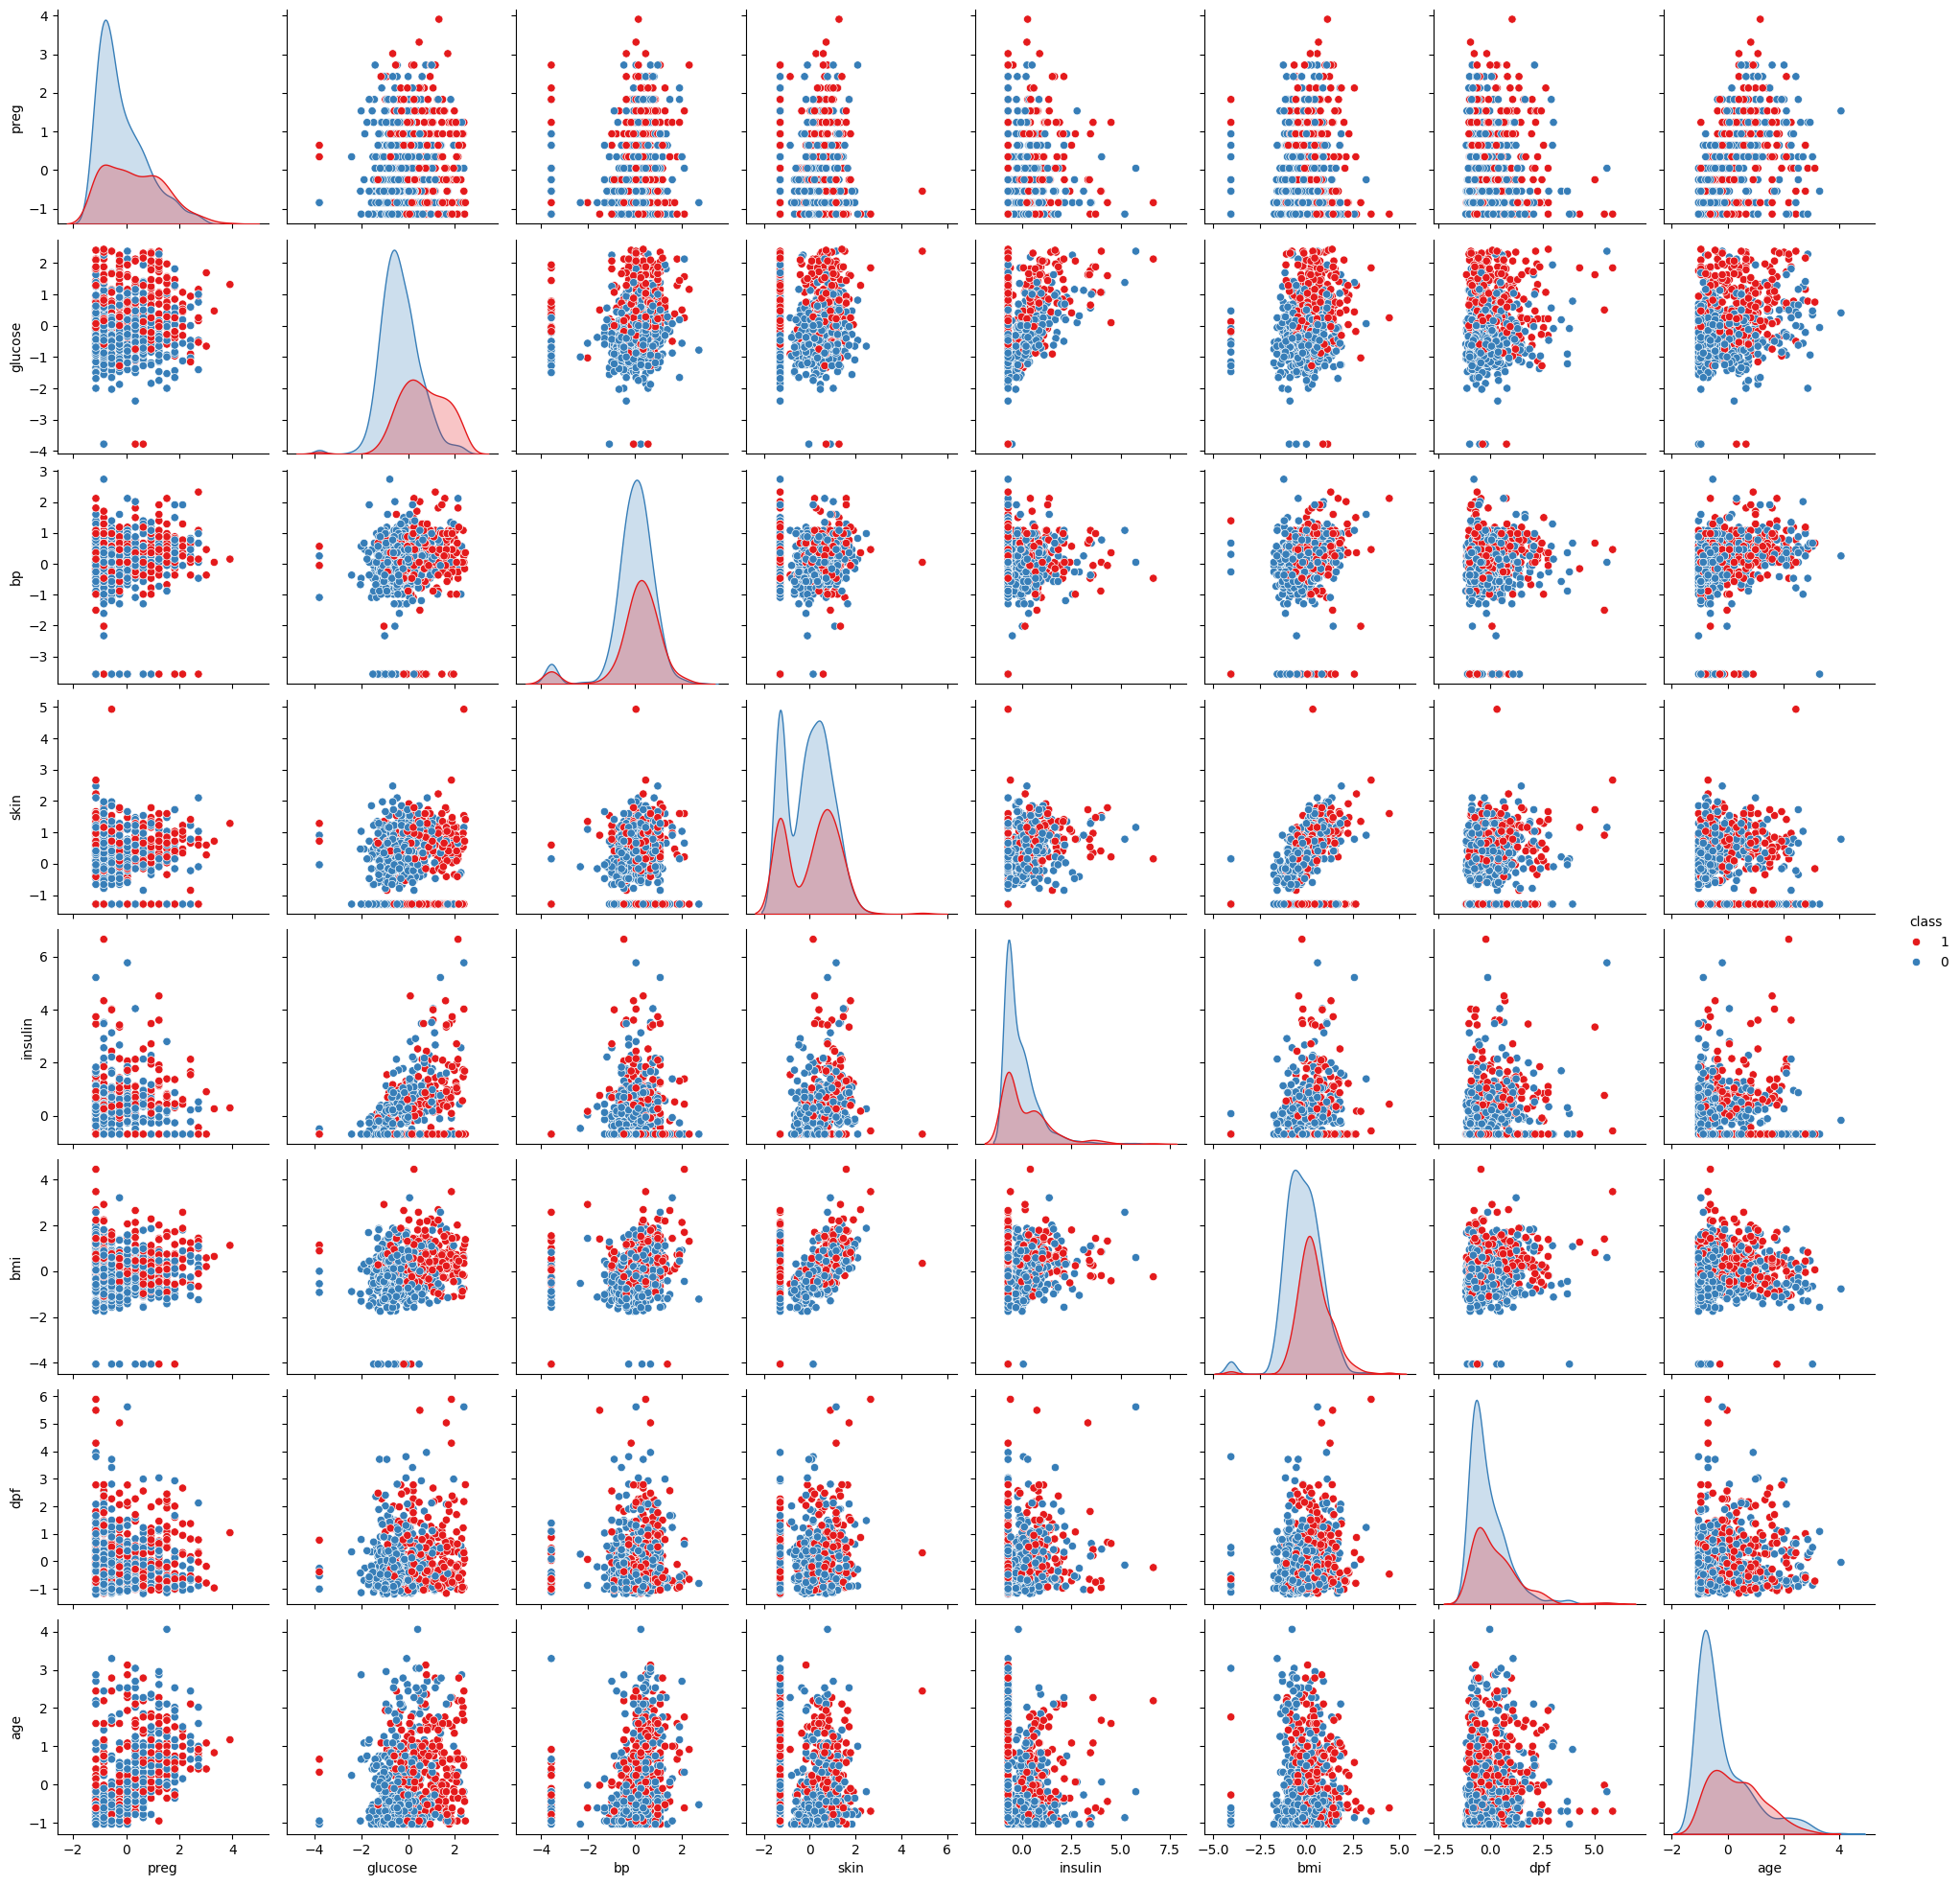

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of all the variables, color-coded by class
sns.pairplot(data_pima, hue="class", palette="Set1")
plt.show()

In [27]:
k_values = np.arange(3, 31, 2)  # Start at 5, stop before 15, step by 2
radius_values = np.arange(1.0, 12.0, 0.5)
print(k_values)
print(radius_values)
best_params = grid_search_optimization(X=X, y=y,classifier=db_knn_predict, k_values=k_values, radius_values=radius_values, n_splits=10, random_state=47)
print(f"Best k: {best_params['best_k']}, Best radius: {best_params['best_radius']}, Best Accuracy: {best_params['best_accuracy']:.6f}")

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5]
Testing k=3, radius=1.0...
k=3, radius=1.0, Mean Accuracy=0.742191
Testing k=3, radius=1.5...
k=3, radius=1.5, Mean Accuracy=0.739593
Testing k=3, radius=2.0...
k=3, radius=2.0, Mean Accuracy=0.739576
Testing k=3, radius=2.5...
k=3, radius=2.5, Mean Accuracy=0.740875
Testing k=3, radius=3.0...
k=3, radius=3.0, Mean Accuracy=0.743489
Testing k=3, radius=3.5...
k=3, radius=3.5, Mean Accuracy=0.742191
Testing k=3, radius=4.0...
k=3, radius=4.0, Mean Accuracy=0.743489
Testing k=3, radius=4.5...
k=3, radius=4.5, Mean Accuracy=0.743489
Testing k=3, radius=5.0...
k=3, radius=5.0, Mean Accuracy=0.744788
Testing k=3, radius=5.5...
k=3, radius=5.5, Mean Accuracy=0.744788
Testing k=3, radius=6.0...
k=3, radius=6.0, Mean Accuracy=0.744788
Testing k=3, radius=6.5...
k=3, radius=6.5, Mean Accuracy=0.744788
Testing k=3, radius=7.0...
k=3, radius=